<a href="https://colab.research.google.com/github/Paulanisiobi/Deep-Learning/blob/master/Deep_Learning_Using_Constitutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
Deep Laerning using Convolutional Neural Networks with TensorFlow Keras

**Deep Learning using Convolutional Neutral Networks on Fashion MNIST dataset with Tensor Flow Keras**



In [5]:
import tensorflow as tf
import numpy as np

import distutils

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# add empty colour dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(64,(5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))
  
  
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(128,(5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))
  
  
  
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(256,(5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))
  
  
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation('softmax'))
  return model
  

In our FIRST Convolution layer, we want to apply 64 5x5 filters to the upper layer, with a ReLU activation function.

in our SECOND convolution layer, we want to apply 256 5x5 filters to the input layer, with ReLU activation function.

We aslo specified Max pooling with a 2x2 filter and stride of 2.

We want to add a dense layer (with 256 neurons and ReLU activation) to our CNN o perform classification on the features extracted by the convolution/pooling layers. Before we connect the layer, however, we will flatten pour feature into a vector that can be fed into

In [22]:
import os

# This address identifies the TPU we will use when configuring TensorFlow
resolver = tf.contrib.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.contrib.distribute.initialize_tpu_system(resolver)
strategy = tf.contrib.distribute.TPUStrategy(resolver)

with strategy. scope():
  model = create_model()
  model.compile(
       optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
       loss='sparse_categorical_crossentropy',
       metrics=['sparse_categorical_accuracy'])
      
model.fit(
        x_train.astype(np.float32), y_train.astype(np.float32),
         epochs=17,
         steps_per_epoch=60,
         validation_data=(x_test.astype(np.float32), y_test.astype(np.float32)),
         validation_freq=17
)
      
model.save_weights('./fashion_mnist.h5', overwrite=True) 

INFO:tensorflow:Initializing the TPU system.
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Querying Tensorflow master (grpc://10.46.52.138:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 6357888511723765028)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 11819947521713820369)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 12434701542559801029)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 15770798816362473711)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 17

this approach achieved an accuracy of about 94% with more advanced approaches, the model can be improved.

**Now that we are done training , we will see how well the model can predict fashion categories.**

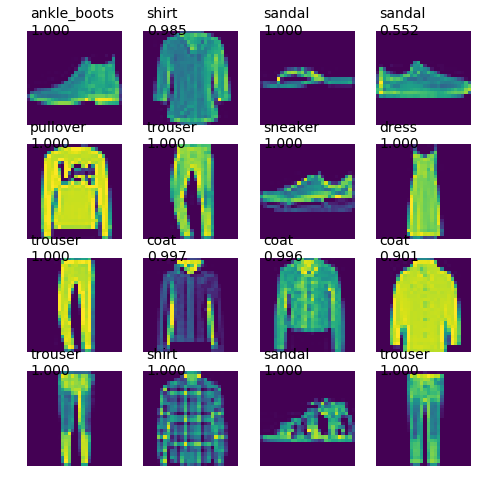

In [48]:
LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']


cpu_model = create_model()
cpu_model.load_weights('./fashion_mnist.h5')

from matplotlib import pyplot
%matplotlib inline

def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(0.5, 0.5, label + '\n%.3f' % confidence, fontsize=14)

  pyplot.gcf().set_size_inches(8, 8)  

plot_predictions(np.squeeze(x_test[:16]), 
                 cpu_model.predict(x_test[:16]))